In [1]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib as mpl  # to visualize data
import seaborn as sns # to visualize data
import matplotlib.colors as mcolors # to visualize colors
import string # collection of alphabets, words or other characters
import re # regular expression support
import nltk 
import pickle
import sklearn.metrics
# import gensim # representing documents as semantic vectors
from sklearn.metrics import *

from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
df_naive_bayes_without_stopwords = pd.read_csv('../../../../Data-Preparation/sentiment140/traindata_without_stopwords_preprocessed.csv')

In [4]:
df_naive_bayes_without_stopwords

,Text,target,Ground_Truth_Label
0,Rise shining lol mins later planned rush door time,4,positive
1,2nd interview today looking promising,4,positive
2,feel pain,0,negative
3,4yr old son went exploring amp hiking today found Luv amphibians,4,positive
4,lonely housemates gone pub,0,negative
...,...,...,...
1279995,held together bubblegum amp blessings,4,positive
1279996,Heehee one,4,positive
1279997,welcome change mind though let know,4,positive
1279998,BET Bring Backup,4,positive


In [5]:
df_naive_bayes_without_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>      1273589
<class 'float'>       6411
Name: count, dtype: int64

In [6]:
df_naive_bayes_without_stopwords['Text'] = df_naive_bayes_without_stopwords['Text'].astype(str)


In [7]:
df_naive_bayes_without_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>    1280000
Name: count, dtype: int64

In [8]:
df_naive_bayes_without_stopwords['target'].value_counts()

target
4    640000
0    640000
Name: count, dtype: int64

In [9]:
def extract_features(text):
    words = word_tokenize(text)
    features = {word.lower(): True for word in words if word.isalpha()}
    return features


In [10]:
df_naive_bayes_without_stopwords['features'] = df_naive_bayes_without_stopwords['Text'].apply(lambda text: extract_features(str(text)))

In [11]:
data = list(zip(df_naive_bayes_without_stopwords['features'], df_naive_bayes_without_stopwords['Ground_Truth_Label']))

In [12]:
classifier = NaiveBayesClassifier.train(data)

In [13]:
df_naive_bayes_without_stopwords

,Text,target,Ground_Truth_Label,features
0,Rise shining lol mins later planned rush door time,4,positive,"{'rise': True, 'shining': True, 'lol': True, 'mins': True, 'later': True, 'planned': True, 'rush': True, 'door': True, 'time': True}"
1,2nd interview today looking promising,4,positive,"{'interview': True, 'today': True, 'looking': True, 'promising': True}"
2,feel pain,0,negative,"{'feel': True, 'pain': True}"
3,4yr old son went exploring amp hiking today found Luv amphibians,4,positive,"{'old': True, 'son': True, 'went': True, 'exploring': True, 'amp': True, 'hiking': True, 'today': True, 'found': True, 'luv': True, 'amphibians': True}"
4,lonely housemates gone pub,0,negative,"{'lonely': True, 'housemates': True, 'gone': True, 'pub': True}"
...,...,...,...,...
1279995,held together bubblegum amp blessings,4,positive,"{'held': True, 'together': True, 'bubblegum': True, 'amp': True, 'blessings': True}"
1279996,Heehee one,4,positive,"{'heehee': True, 'one': True}"
1279997,welcome change mind though let know,4,positive,"{'welcome': True, 'change': True, 'mind': True, 'though': True, 'let': True, 'know': True}"
1279998,BET Bring Backup,4,positive,"{'bet': True, 'bring': True, 'backup': True}"


In [14]:
print(f'Accuracy: {accuracy(classifier, data):.2f}')

Accuracy: 0.80


In [15]:
df_naive_bayes_without_stopwords['Prediction'] = df_naive_bayes_without_stopwords['features'].apply(classifier.classify)

In [16]:
df_naive_bayes_without_stopwords.head()

,Text,target,Ground_Truth_Label,features,Prediction
0,Rise shining lol mins later planned rush door time,4,positive,"{'rise': True, 'shining': True, 'lol': True, 'mins': True, 'later': True, 'planned': True, 'rush': True, 'door': True, 'time': True}",positive
1,2nd interview today looking promising,4,positive,"{'interview': True, 'today': True, 'looking': True, 'promising': True}",positive
2,feel pain,0,negative,"{'feel': True, 'pain': True}",negative
3,4yr old son went exploring amp hiking today found Luv amphibians,4,positive,"{'old': True, 'son': True, 'went': True, 'exploring': True, 'amp': True, 'hiking': True, 'today': True, 'found': True, 'luv': True, 'amphibians': True}",positive
4,lonely housemates gone pub,0,negative,"{'lonely': True, 'housemates': True, 'gone': True, 'pub': True}",negative


In [17]:
accuracy = accuracy_score(df_naive_bayes_without_stopwords['Ground_Truth_Label'], df_naive_bayes_without_stopwords['Prediction'])
print(accuracy)

0.796078125


In [18]:
# Berechnung der Metriken
accuracy = accuracy_score(df_naive_bayes_without_stopwords['Ground_Truth_Label'], df_naive_bayes_without_stopwords['Prediction'])
precision = precision_score(df_naive_bayes_without_stopwords['Ground_Truth_Label'], df_naive_bayes_without_stopwords['Prediction'], pos_label='positive')
recall = recall_score(df_naive_bayes_without_stopwords['Ground_Truth_Label'], df_naive_bayes_without_stopwords['Prediction'], pos_label='positive')
f1 = f1_score(df_naive_bayes_without_stopwords['Ground_Truth_Label'], df_naive_bayes_without_stopwords['Prediction'], pos_label='positive')

In [19]:
# Ausgabe der Metriken
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.80
Precision: 0.83
Recall: 0.75
F1 Score: 0.79


In [20]:
# Vollständiger Bericht
print("\nClassification Report:\n")
print(classification_report(df_naive_bayes_without_stopwords['Ground_Truth_Label'], df_naive_bayes_without_stopwords['Prediction'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.77      0.85      0.81    640000
    positive       0.83      0.75      0.79    640000

    accuracy                           0.80   1280000
   macro avg       0.80      0.80      0.80   1280000
weighted avg       0.80      0.80      0.80   1280000



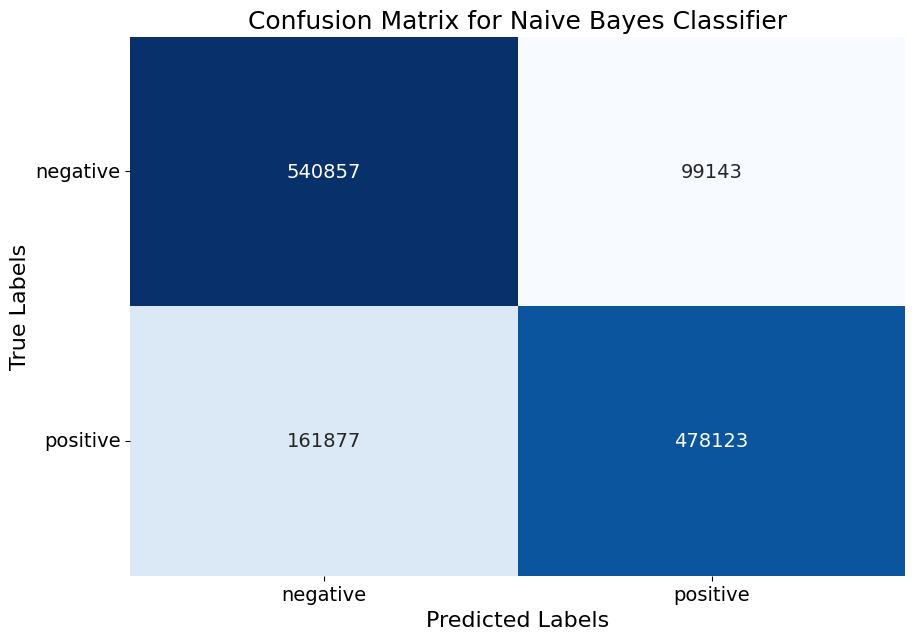

In [21]:
cm_nb = confusion_matrix(df_naive_bayes_without_stopwords['Ground_Truth_Label'], df_naive_bayes_without_stopwords['Prediction'])


# Erstellen der Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for Naive Bayes Classifier', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()

In [22]:
print(cm_nb)

[[540857  99143]
 [161877 478123]]


In [23]:
classifier.show_most_informative_features(10)

Most Informative Features
                    sadd = True           negati : positi =     55.7 : 1.0
                  ouchie = True           negati : positi =     55.0 : 1.0
                 sadface = True           negati : positi =     45.4 : 1.0
             shareholder = True           positi : negati =     42.3 : 1.0
                saddened = True           negati : positi =     39.0 : 1.0
                  triste = True           negati : positi =     37.0 : 1.0
                  farrah = True           negati : positi =     36.2 : 1.0
                 mcmahon = True           negati : positi =     35.9 : 1.0
                 unloved = True           negati : positi =     35.8 : 1.0
                 saddens = True           negati : positi =     32.6 : 1.0


In [24]:
with open('naive_bayes_without_stopwords_classifier.pkl', 'wb') as file:
    pickle.dump(classifier, file)